In [29]:
import time 

In [30]:
import random

def funcao_objetivo_cb(candidato):
    return sum(candidato)

def gene_cb():
    valores_possiveis = [0, 1]
    gene = random.choice(valores_possiveis)
    return gene

def cria_candidato_cb(n):
    candidato = []
    for _ in range(n):
        gene = gene_cb()
        candidato.append(gene)
    return candidato

In [31]:
TESTE_CAIXAS = list(range(1, 21))
NUMERO_TESTES = 20

NUM_CAIXAS = list(range(3, 20))

In [32]:
dict_aleatorio = {}

for j in NUM_CAIXAS:
    tempos_aleatorio = []
    for _ in range(NUMERO_TESTES):

        inicio_aleatorio = time.time()

        NUM_SORTEIOS = 1000

        caixas = []

        for i in range(NUM_SORTEIOS):
            candidato = cria_candidato_cb(i)
            caixas.append(candidato)

        fim_aleatorio = time.time()

        tempo_execucao_aleatorio = fim_aleatorio - inicio_aleatorio

        tempos_aleatorio.append(tempo_execucao_aleatorio)

    dict_aleatorio[j] = sum(tempos_aleatorio)/NUMERO_TESTES

dict_aleatorio


{3: 0.20805490016937256,
 4: 0.20330919027328492,
 5: 0.20203412771224977,
 6: 0.20651822090148925,
 7: 0.19927172660827636,
 8: 0.20254073143005372,
 9: 0.19803149700164796,
 10: 0.38482370376586916,
 11: 0.37545987367630007,
 12: 0.3965956449508667,
 13: 0.36116570234298706,
 14: 0.4027677536010742,
 15: 0.39532735347747805,
 16: 0.3824615001678467,
 17: 0.40123687982559203,
 18: 0.4306671619415283,
 19: 0.4259613394737244}

In [33]:
dict_grade = {}

for j in NUM_CAIXAS:
    tempos_grade = []

    for _ in range(NUMERO_TESTES):

        inicio_grade = time.time()

        from itertools import product

        caixas = []

        for candidato in product([0, 1], repeat=j):
            caixas.append(candidato)

        fim_grade = time.time()

        tempo_execucao_grade = fim_grade - inicio_grade

        tempos_grade.append(tempo_execucao_grade)

    dict_grade[j] = sum(tempos_grade)/NUMERO_TESTES

In [34]:
dict_grade

{3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0009468436241149902,
 11: 0.0007244586944580078,
 12: 0.002157759666442871,
 13: 0.0026317477226257325,
 14: 0.00770719051361084,
 15: 0.01738523244857788,
 16: 0.037580251693725586,
 17: 0.07198146581649781,
 18: 0.15825283527374268,
 19: 0.3438688039779663}

In [35]:
from funcoes_4 import funcao_objetivo_pop_cb as funcao_objetivo
from funcoes_4 import populacao_cb as cria_populacao
from funcoes_4 import selecao_roleta_max as funcao_selecao
from funcoes_4 import cruzamento_ponto_simples as funcao_cruzamento
from funcoes_4 import mutacao_simples_cb as funcao_mutacao
from pprint import pprint
import random

In [36]:
TAMANHO_POPULACAO = 10
NUM_GERACOES = 50
CHANCE_DE_CRUZAMENTO = 0.5
CHANCE_DE_MUTACAO = 0.05

In [37]:
dict_genetico = {}

for j in NUM_CAIXAS:
    populacao = cria_populacao(TAMANHO_POPULACAO, j)
    tempos_genetico = []

    for _ in range(NUMERO_TESTES):

        inicio_genetico = time.time()

        hall_da_fama = []

        for n in range(NUM_GERACOES):
            # Seleção
            fitness = funcao_objetivo(populacao)        
            selecionados = funcao_selecao(populacao, fitness)
            
            # Cruzamento
            proxima_geracao = []
            for pai, mae in zip(selecionados[::2], selecionados[1::2]):
                individuo1, individuo2 = funcao_cruzamento(pai, mae, CHANCE_DE_CRUZAMENTO)
                proxima_geracao.append(individuo1)
                proxima_geracao.append(individuo2)
            
            # Mutação
            funcao_mutacao(proxima_geracao, CHANCE_DE_MUTACAO)
            
            # Atualização do hall da fama
            fitness = funcao_objetivo(proxima_geracao)
                
            maior_fitness = max(fitness)
            indice = fitness.index(maior_fitness)
            hall_da_fama.append(proxima_geracao[indice])    
            
            # Encerramento
            populacao = proxima_geracao


        fitness = funcao_objetivo(hall_da_fama)
        maior_fitness = max(fitness)
        indice = fitness.index(maior_fitness)
        melhor_individuo_observado = hall_da_fama[indice]

        fim_genetico = time.time()

        tempo_execucao_genetico = fim_genetico - inicio_genetico

        tempos_genetico.append(tempo_execucao_genetico)

    dict_genetico[j] = sum(tempos_genetico)/NUMERO_TESTES

In [38]:
dict_genetico

{3: 0.0015168905258178711,
 4: 0.0018913626670837402,
 5: 0.0017219185829162598,
 6: 0.0017350316047668457,
 7: 0.0020734429359436034,
 8: 0.0019525885581970215,
 9: 0.0015188932418823242,
 10: 0.0033312082290649415,
 11: 0.0013315439224243163,
 12: 0.0015013694763183593,
 13: 0.002319777011871338,
 14: 0.00236285924911499,
 15: 0.0020482182502746583,
 16: 0.0022886037826538087,
 17: 0.0023438215255737306,
 18: 0.001767265796661377,
 19: 0.0017333149909973145}

In [39]:
print(f'Tempo de execução da busca aleatória: {sum(tempos_aleatorio)/NUMERO_TESTES}\nTempo de execução da busca em grade: {sum(tempos_grade)/NUMERO_TESTES}\nTempo de execução algoritmo genético: {sum(tempos_genetico)/NUMERO_TESTES}')

Tempo de execução da busca aleatória: 0.4259613394737244
Tempo de execução da busca em grade: 0.3438688039779663
Tempo de execução algoritmo genético: 0.0017333149909973145


In [41]:
import pandas as pd

tabela = pd.DataFrame({
    "Caixas Binárias": dict_aleatorio.keys(),
    "Busca Aleatória": dict_aleatorio.values(),
    "Busca em Grade": dict_grade.values(),
    "Algoritmo Genético": dict_genetico.values()
})

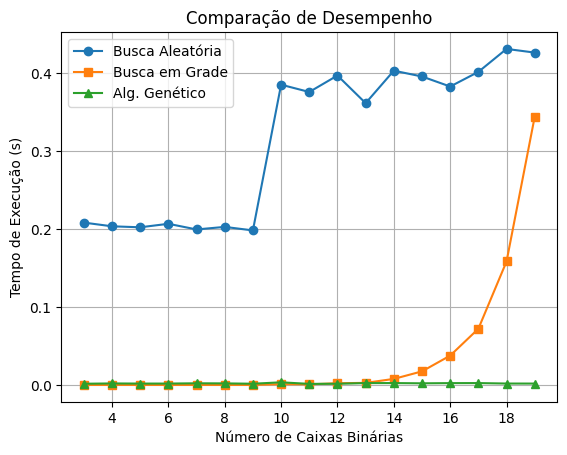

In [45]:
import matplotlib.pyplot as plt

x = list(dict_aleatorio.keys())
y_aleatorio = list(dict_aleatorio.values())
y_grade = list(dict_grade.values())
y_genetico = list(dict_genetico.values())

plt.plot(x, y_aleatorio, label="Busca Aleatória", marker='o')
plt.plot(x, y_grade, label="Busca em Grade", marker='s')
plt.plot(x, y_genetico, label="Alg. Genético", marker='^')

plt.xlabel("Número de Caixas Binárias")
plt.ylabel("Tempo de Execução (s)")
plt.title("Comparação de Desempenho")
plt.legend()
plt.grid(True)

plt.show()